In [1]:
import tensorflow as tf

In [2]:
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

In [3]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [4]:
model.fit(x, y, epochs = 200)

Train on 6 samples
Epoch 1/200
6/6 [==============================] - 0s 26ms/sample - loss: 1.8448
Epoch 2/200
6/6 [==============================] - 0s 675us/sample - loss: 1.5931
Epoch 3/200
6/6 [==============================] - 0s 730us/sample - loss: 1.3922
Epoch 4/200
6/6 [==============================] - 0s 641us/sample - loss: 1.2313
Epoch 5/200
6/6 [==============================] - 0s 545us/sample - loss: 1.1019
Epoch 6/200
6/6 [==============================] - 0s 622us/sample - loss: 0.9973
Epoch 7/200
6/6 [==============================] - 0s 671us/sample - loss: 0.9124
Epoch 8/200
6/6 [==============================] - 0s 537us/sample - loss: 0.8430
Epoch 9/200
6/6 [==============================] - 0s 513us/sample - loss: 0.7858
Epoch 10/200
6/6 [==============================] - 0s 628us/sample - loss: 0.7383
Epoch 11/200
6/6 [==============================] - 0s 663us/sample - loss: 0.6984
Epoch 12/200
6/6 [==============================] - 0s 549us/sample - loss: 0.

Epoch 100/200
6/6 [==============================] - 0s 675us/sample - loss: 0.0942
Epoch 101/200
6/6 [==============================] - 0s 712us/sample - loss: 0.0923
Epoch 102/200
6/6 [==============================] - 0s 610us/sample - loss: 0.0904
Epoch 103/200
6/6 [==============================] - 0s 578us/sample - loss: 0.0885
Epoch 104/200
6/6 [==============================] - 0s 630us/sample - loss: 0.0867
Epoch 105/200
6/6 [==============================] - 0s 601us/sample - loss: 0.0849
Epoch 106/200
6/6 [==============================] - 0s 627us/sample - loss: 0.0832
Epoch 107/200
6/6 [==============================] - 0s 554us/sample - loss: 0.0815
Epoch 108/200
6/6 [==============================] - 0s 608us/sample - loss: 0.0798
Epoch 109/200
6/6 [==============================] - 0s 584us/sample - loss: 0.0782
Epoch 110/200
6/6 [==============================] - 0s 630us/sample - loss: 0.0766
Epoch 111/200
6/6 [==============================] - 0s 574us/sample - loss:

Epoch 198/200
6/6 [==============================] - 0s 1ms/sample - loss: 0.0123
Epoch 199/200
6/6 [==============================] - 0s 870us/sample - loss: 0.0121
Epoch 200/200
6/6 [==============================] - 0s 1ms/sample - loss: 0.0118


In [5]:
export_dir = "saved_model/1"
tf.saved_model.save(model, export_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/1/assets


In [6]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [9]:
import pathlib
tflite_model_file = pathlib.Path('TFLiteModel/model.tflite')
tflite_model_file.write_bytes(tflite_model)

772

In [11]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [12]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [13]:
print(input_details)
print(output_details)
input_shape = input_details[0]['shape']
inputs, outputs = [], []

[{'name': 'dense_input', 'index': 3, 'shape': array([1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]
[{'name': 'Identity', 'index': 0, 'shape': array([1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]


In [16]:
import numpy as np
for _ in range(100):
    input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_details[0]['index'])
    
    tf_results = model(tf.constant(input_data))
    output_data = np.array(tf_results)
    
    inputs.append(input_data[0][0])
    outputs.append(output_data[0][0])

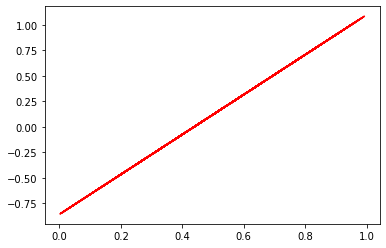

In [19]:
import matplotlib.pyplot as plt
plt.plot(inputs, outputs, 'r')
plt.show()